<a href="https://colab.research.google.com/github/DinhCongNgoc/AI/blob/main/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Khai báo thư viện numpy là np 
from keras.utils import np_utils # thư viện xử lý chuyển class
from keras.datasets import fashion_mnist # gọi tập dataset thời trang
from keras.models import Sequential # hàm chạy mô hình
from keras.layers import Dense, Dropout # tạo mạng nơ ron
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  # thư viện dùng để vẽ

In [ ]:
# chia tập dữ liệu thành 2 bộ train và test
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# xem kích thược của tập dữ liệu
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000,)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000,)


In [ ]:
#chuyển chiều của x từ 3 chiều về 2 chiều
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
# ép kiểu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#chuẩn hóa dữ liệu
x_train /=255
x_test /=255
#chuyển y từ 1 class thành 10 class
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
#tạo mạng nơ-ron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#chạy model với số lần học là 500 và độ kiên nhẫn là 100
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=100)])

Epoch 1/500
375/375 [==============================] - 7s 16ms/step - loss: 0.5921 - accuracy: 0.7832 - val_loss: 0.5249 - val_accuracy: 0.8053
Epoch 2/500
375/375 [==============================] - 6s 15ms/step - loss: 0.4173 - accuracy: 0.8471 - val_loss: 0.3722 - val_accuracy: 0.8643
Epoch 3/500
375/375 [==============================] - 6s 15ms/step - loss: 0.3737 - accuracy: 0.8631 - val_loss: 0.3580 - val_accuracy: 0.8701
Epoch 4/500
375/375 [==============================] - 6s 15ms/step - loss: 0.3540 - accuracy: 0.8702 - val_loss: 0.3502 - val_accuracy: 0.8740
Epoch 5/500
375/375 [==============================] - 6s 16ms/step - loss: 0.3399 - accuracy: 0.8752 - val_loss: 0.3624 - val_accuracy: 0.8776
Epoch 6/500
375/375 [==============================] - 6s 15ms/step - loss: 0.3301 - accuracy: 0.8809 - val_loss: 0.3348 - val_accuracy: 0.8800
Epoch 7/500
375/375 [==============================] - 6s 17ms/step - loss: 0.3181 - accuracy: 0.8850 - val_loss: 0.3575 - val_accuracy:

Sai số kiểm tra là:  1.1239511966705322
Độ chính xác kiểm tra là:  0.8885999917984009


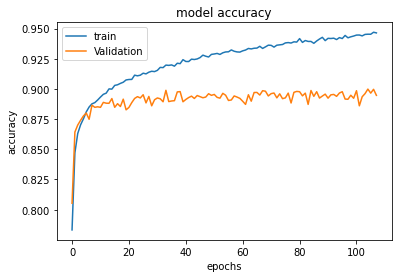

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
#vẽ đồ thị
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()